In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.simplefilter(action='ignore')
sns.set()

In [2]:
# # Load the Dataset
file_path = r"C:\\Users\\arman.manoukyan\\Downloads\\diabetes_prediction_dataset.csv"  # Updated path
df = pd.read_csv(file_path)

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
# Preview Dataset
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [5]:
# Dataset Information
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [6]:
# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


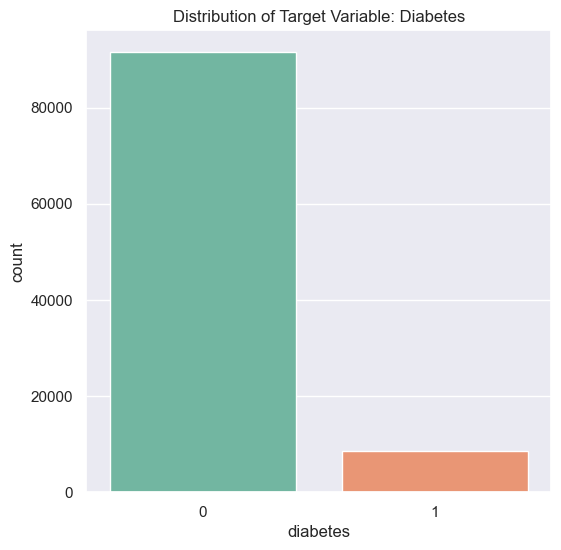

In [7]:
# # Exploratory Data Analysis (EDA)
# Target Variable Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='diabetes', data=df, palette='Set2')
plt.title("Distribution of Target Variable: Diabetes")
plt.show()

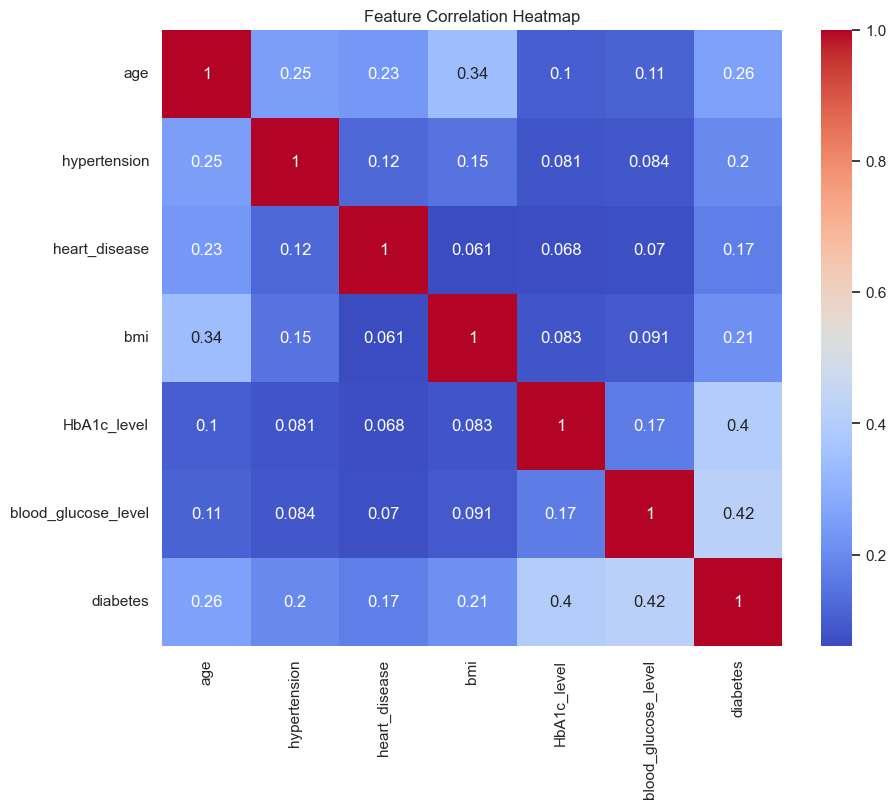

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

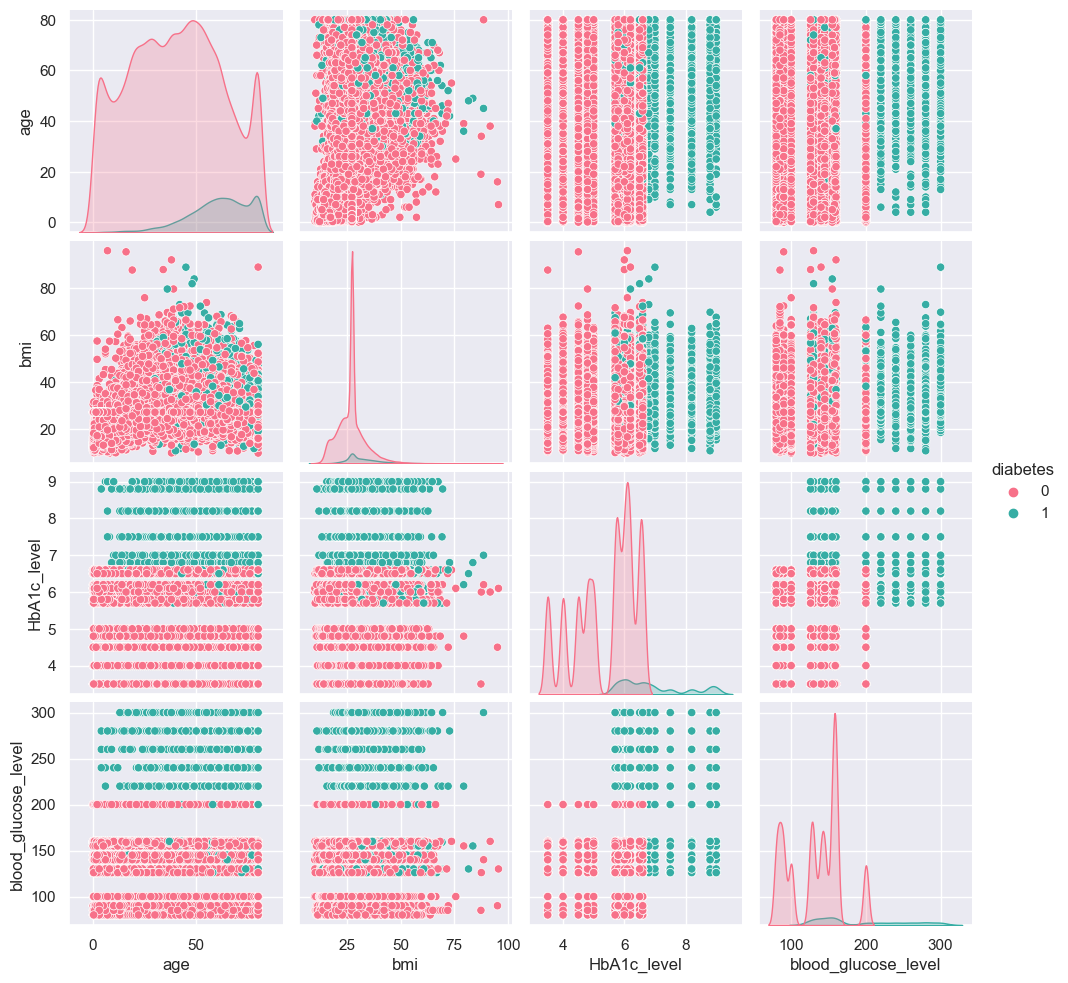

In [9]:
# Pairplot for numeric features
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
sns.pairplot(df, hue='diabetes', vars=numeric_features, palette='husl')
plt.show()

In [10]:
# # Data Preprocessing
# One-Hot Encoding for Categorical Features
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Scaling Continuous Features
features_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])




In [11]:
# Define X (Features) and y (Target)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
# # Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [13]:
# Train and Evaluate Models
results = {}
metrics = {}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    print(f"\nTraining {name}...")
    scores = []
    for train_idx, val_idx in kfold.split(X_train, y_train):
        model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
        y_pred = model.predict(X_train.iloc[val_idx])
        acc = accuracy_score(y_train.iloc[val_idx], y_pred)
        scores.append(acc)
    avg_acc = np.mean(scores)
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test))
    results[name] = test_acc
    metrics[name] = {'Accuracy': test_acc, 'Precision': precision, 'Recall': recall, 'AUC': auc}
    print(f"{name} - Accuracy: {test_acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {auc:.4f}")
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))



Training Logistic Regression...
Logistic Regression - Accuracy: 0.9600, Precision: 0.8606, Recall: 0.6318, AUC: 0.9626
[[18126   174]
 [  626  1074]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.63      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Training KNN...
KNN - Accuracy: 0.9613, Precision: 0.8944, Recall: 0.6176, AUC: 0.9036
[[18176   124]
 [  650  1050]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.89      0.62      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.93      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Training SVM...
SVM - Accuracy: 0.9624, Precision: 0.9665, Recall: 0.5776, 

In [14]:
# # Model Comparison
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy
5    Gradient Boosting   0.97225
6              XGBoost   0.97070
4        Random Forest   0.97035
2                  SVM   0.96240
1                  KNN   0.96130
0  Logistic Regression   0.96000
3        Decision Tree   0.95175


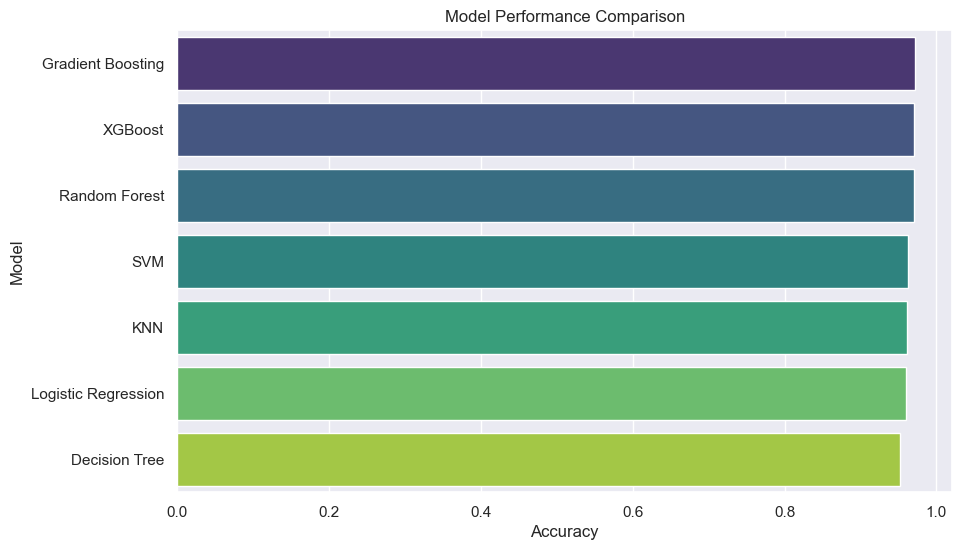

In [15]:
# Plot Results
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title("Model Performance Comparison")
plt.show()

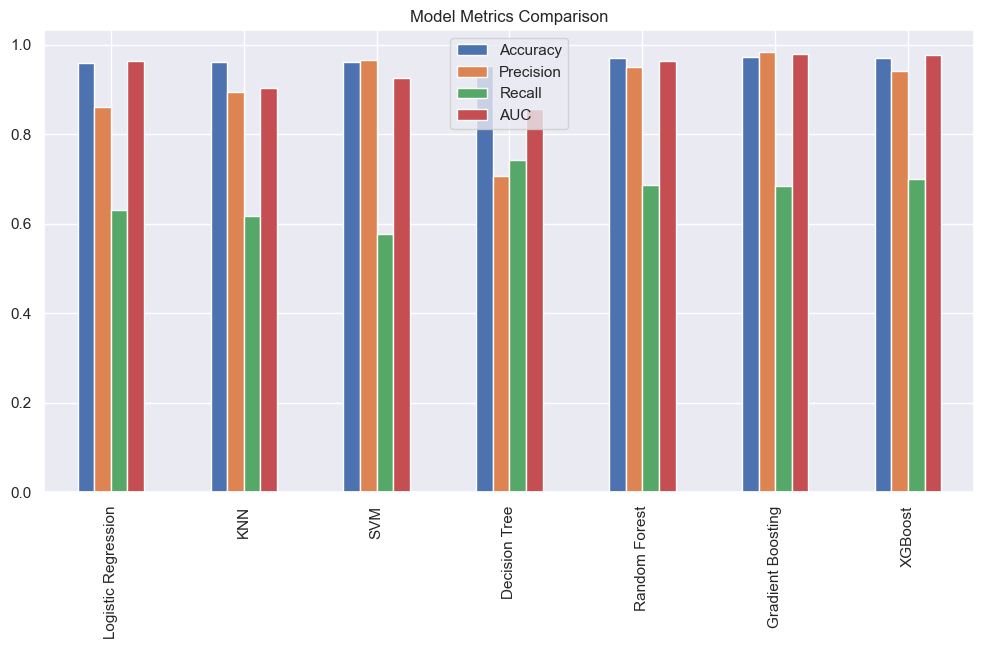

In [16]:
# Plot Metrics
metrics_df = pd.DataFrame(metrics).T
metrics_df.plot(kind='bar', figsize=(12, 6), title='Model Metrics Comparison')
plt.show()

In [17]:
# # Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest (Tuned) - Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}

Random Forest (Tuned) - Accuracy: 0.9723
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.99      0.68      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



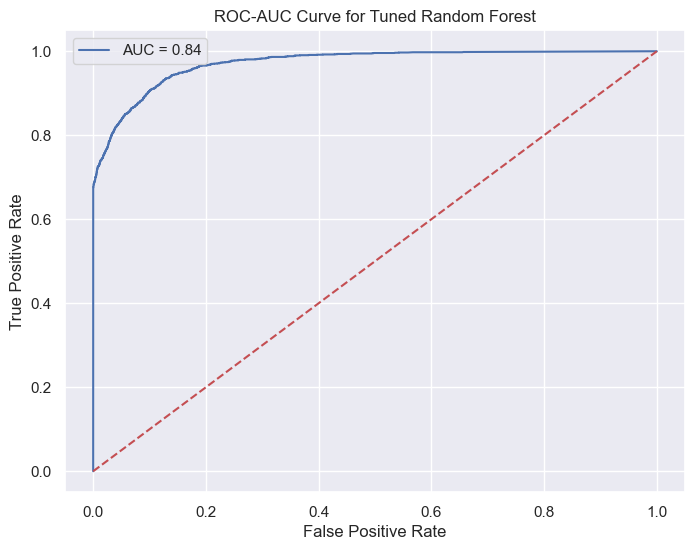

In [19]:
# Import required function
from sklearn.metrics import roc_curve

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_rf):.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC-AUC Curve for Tuned Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
